In [1]:
!pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train:",X_train.shape)
print("Test:",X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: (60000, 28, 28)
Test: (10000, 28, 28)


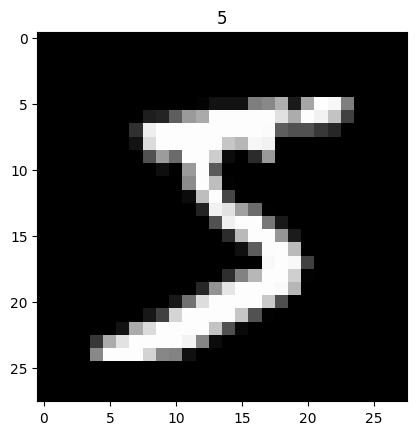

In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train_flat = X_train.reshape(-1,784)
X_test_flat = X_test.reshape(-1,784)

In [7]:
model_lr = LogisticRegression(max_iter=1000)

model_lr.fit(X_train_flat,y_train)

LogisticRegression(max_iter=1000)

In [8]:
pred_lr = model_lr.predict(X_test_flat)

accuracy_lr = accuracy_score(y_test,pred_lr)

print("Accuracy:",accuracy_lr)

Accuracy: 0.9259


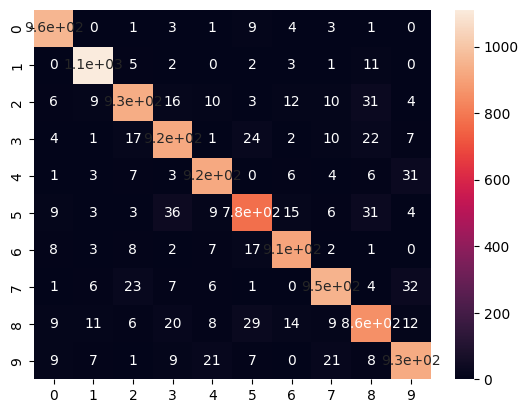

In [9]:
cm = confusion_matrix(y_test,pred_lr)

sns.heatmap(cm,annot=True)

plt.show()

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [11]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [12]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

model_cnn.add(MaxPooling2D())

model_cnn.add(Flatten())

model_cnn.add(Dense(128,activation='relu'))

model_cnn.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model_cnn.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

In [14]:
history = model_cnn.fit(
X_train_cnn,
y_train,
epochs=5,
validation_data=(X_test_cnn,y_test)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.9028 - loss: 0.3143 - val_accuracy: 0.9820 - val_loss: 0.0600
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9838 - loss: 0.0560 - val_accuracy: 0.9834 - val_loss: 0.0472
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9894 - loss: 0.0345 - val_accuracy: 0.9850 - val_loss: 0.0461
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9936 - loss: 0.0213 - val_accuracy: 0.9850 - val_loss: 0.0484
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.9855 - val_loss: 0.0462


In [15]:
loss,accuracy_cnn = model_cnn.evaluate(X_test_cnn,y_test)

print("CNN Accuracy:",accuracy_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9812 - loss: 0.0566
CNN Accuracy: 0.9854999780654907


In [16]:
print("Logistic Regression:",accuracy_lr)
print("CNN:",accuracy_cnn)

Logistic Regression: 0.9259
CNN: 0.9854999780654907


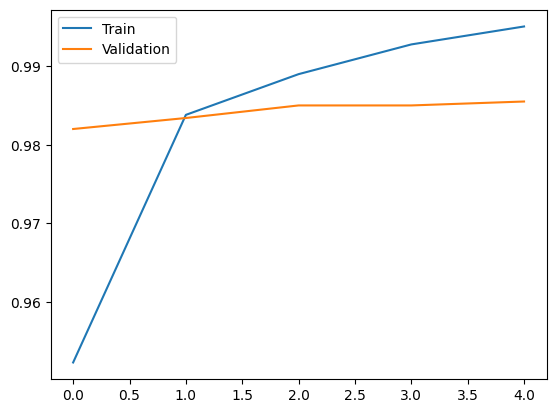

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(["Train","Validation"])

plt.show()